In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np

In [88]:
df = pd.read_csv('../DataSets/Prem_Transfer_Data')

In [90]:
df['Fee (€)'] = df['Fee'].copy()

df['Fee (€)'] = df['Fee (€)'].replace('free transfer', '0')
df['Fee (€)'] = df['Fee (€)'].replace('-', '0')
df['Fee (€)'] = df['Fee (€)'].replace('?', np.nan)
df['Fee (€)'] = df['Fee (€)'].str.replace('€', '') 
df['Fee (€)'] = df['Fee (€)'].str.replace('m', 'e6')
df['Fee (€)'] = df['Fee (€)'].str.replace('k', 'e3')

df['Fee (€)'] = pd.to_numeric(df['Fee (€)'], errors='coerce')

Text(0, 0.5, 'Dependent (y)')

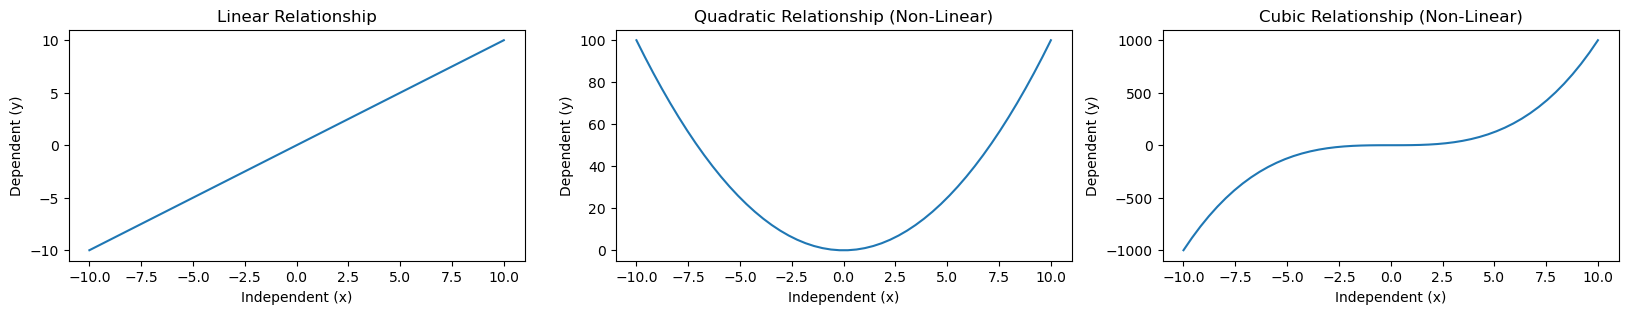

In [179]:
fig, axes = plt.subplots(1,3, figsize=(20,3))
axes[0].plot(x, y)
axes[0].set_title('Linear Relationship')
axes[0].set_xlabel('Independent (x)')
axes[0].set_ylabel('Dependent (y)')
axes[1].plot(x, y_q)
axes[1].set_title('Quadratic Relationship (Non-Linear)')
axes[1].set_xlabel('Independent (x)')
axes[1].set_ylabel('Dependent (y)')
axes[2].plot(x, y_c)
axes[2].set_title('Cubic Relationship (Non-Linear)')
axes[2].set_xlabel('Independent (x)')
axes[2].set_ylabel('Dependent (y)')

Text(0, 0.5, 'Mean Spend (€)')

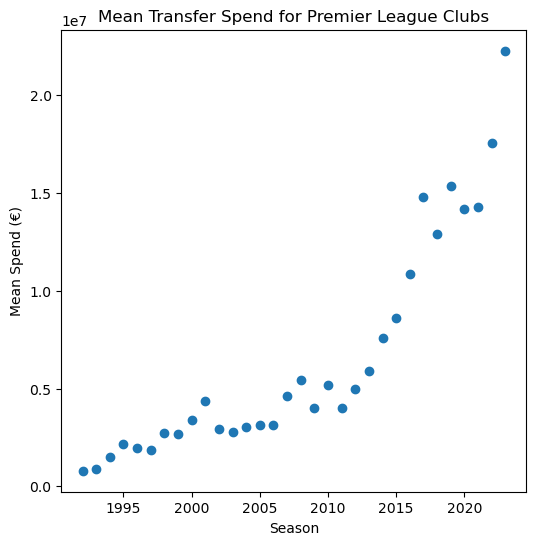

In [178]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
ax.set_title('Mean Transfer Spend for Premier League Clubs')
ax.set_xlabel('Season')
ax.set_ylabel('Mean Spend (€)')

0.8859870717429303


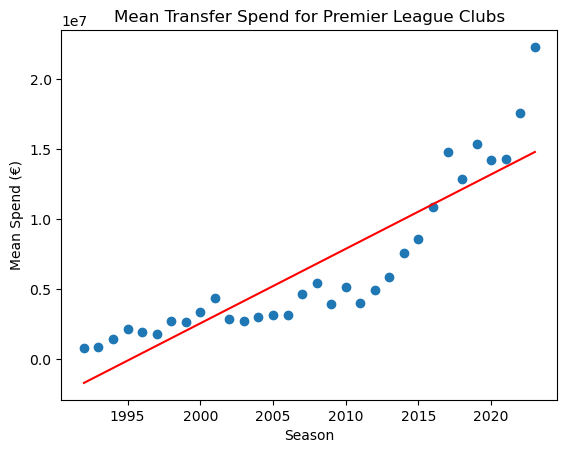

In [181]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())

fig, ax = plt.subplots()
ax.scatter(df['Year'].unique(), df[df['In/Out'] == 'In'].groupby('Year')['Fee (€)'].mean())
ax.plot(df['Year'].unique(), slope*df['Year'].unique()+intercept, color='red')
ax.set_title('Mean Transfer Spend for Premier League Clubs')
ax.set_xlabel('Season')
ax.set_ylabel('Mean Spend (€)')

print(r_value)

In [136]:
def non_linear_model(x, a, b, c):
    return a * (x**2) + b * x + c

In [137]:
params, covariance = curve_fit(non_linear_model, df['Year'].unique(), df.groupby('Year')['Fee (€)'].mean())
a, b, c = params

In [138]:
y_curve = non_linear_model(df['Year'].unique(), a, b, c)

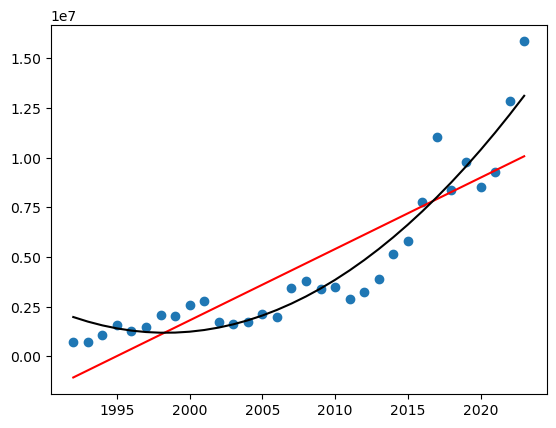

In [139]:
fig, ax = plt.subplots()
ax.scatter(df['Year'].unique(), df.groupby('Year')['Fee (€)'].mean())
ax.plot(df['Year'].unique(), slope*df['Year'].unique()+intercept, color='red')
ax.plot(df['Year'].unique(), y_curve, color='black')

In [125]:
a

-356362380.311016

In [126]:
b

89.54141558117166

In [ ]:
r_squared = 1 - sum((y - y_fit)**2) / sum((y - np.mean(y))**2)

In [146]:
x = np.linspace(-10, 10)
y = x
y_q = x ** 2
y_c = x**3

Text(0, 0.5, 'Dependent (y)')

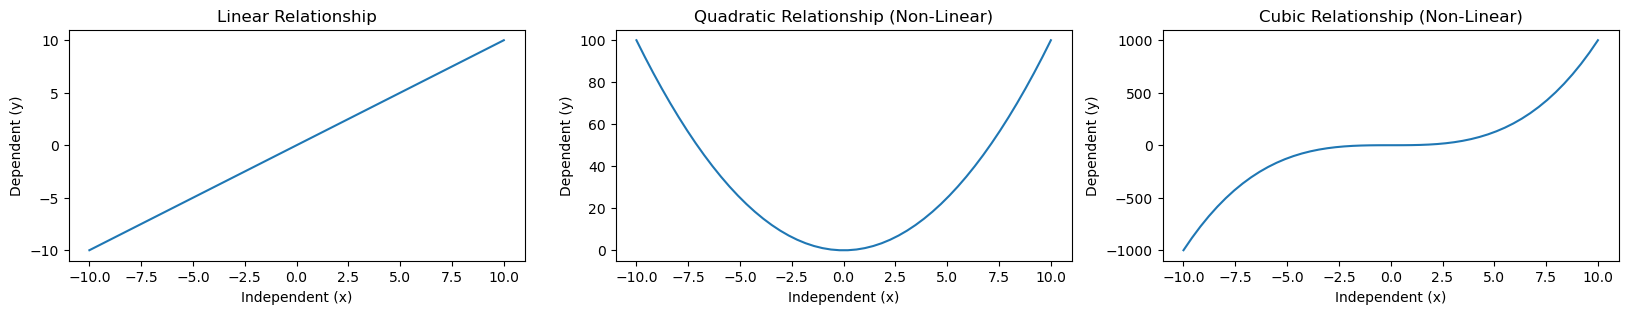